# Selección de imagen para nuestra marca de equipamiento de tenis

#### Código librerias

In [32]:
# Classics
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

# Data Visualization
from ipywidgets import interact
import plotly.express as px
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Time Series Analysis
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Importación del dataset

#### Código

In [60]:
tdf=pd.read_excel('ATP_Tennis_Stats.xlsx')

In [61]:
# Limpieza y finalización del data set

In [62]:
tdf_2012=tdf[tdf['Año']==2012]

In [63]:
# Características de los jugadores

In [64]:
tdf_2012['Tarifa Jugador'] = [200000 if x<=8 else 100000 if 9<=x<30 else 50000 for x in tdf_2012['Ranking']]

In [65]:
tdf_2012['Perfil jugador'] = ['Restador' if x<3.500 else 'Equilibrado' if 3.500<=x<6.000 else 'Sacador' for x in tdf_2012['Prom. Aces Por Partido']]

In [66]:
tdf_2012.sort_values(['Ranking'],inplace=True)

In [67]:
tdf_2012.set_index('Ranking',inplace=True)

### Dataset

In [104]:
tdf_2012.head(10)

,Jugador,Nacionalidad,Edad,Altura cm,Año,Efectividad Al Saque ©,% 1er Servicio,% Puntos Ganados 1er Saque,% Puntos Ganados 2do Saque,% Games Ganados Saque,...,Efectividad Bajo Presión,% Break Points Convertidos.1,% Break Points Salvados,% Tie Breaks Ganados,% Victorias Sets Definitivos,Tiempo de partido (min),% de Victorias,Lesiones,Tarifa Jugador,Perfil jugador
Ranking,,,,,,,,,,,,,,,,,,,,,
1,Novak Djokovic,Serbia,25,188,2012,286.7,64.2,74.9,56.4,87.0,...,255.5,46.5,66.2,58.6,84.2,117,86.21,1,200000,Equilibrado
2,Roger Federer,Switzerland,31,185,2012,298.3,62.9,77.7,59.9,91.0,...,252.9,41.9,68.6,60.0,82.4,105,85.54,1,200000,Sacador
3,Andy Murray,United Kingdom,25,191,2012,277.1,59.9,74.0,54.4,83.9,...,230.2,41.2,66.7,66.7,55.6,128,77.78,1,200000,Sacador
4,Rafael Nadal,Spain,26,185,2012,289.0,67.4,74.6,57.1,87.8,...,242.4,49.2,70.5,72.7,50.0,124,87.50,0,200000,Restador
5,David Ferrer,Spain,30,175,2012,279.9,63.4,73.1,56.7,85.5,...,264.9,44.1,65.0,62.5,93.3,109,83.52,0,200000,Restador
6,Tomas Berdych,Czech Republic,27,196,2012,282.5,58.7,77.5,53.3,86.9,...,231.4,42.4,70.8,51.5,66.7,117,72.62,0,200000,Sacador
7,Juan Martin del Potro,Argentina,24,198,2012,287.3,64.7,75.1,54.6,87.5,...,244.8,43.2,68.8,61.4,71.4,119,79.27,1,200000,Sacador
8,Janko Tipsarevic,Serbia,28,180,2012,276.2,57.8,75.3,54.4,83.2,...,225.1,40.2,63.2,65.7,56.0,116,66.67,0,200000,Sacador
9,Jo-Wilfried Tsonga,France,27,188,2012,283.6,61.9,75.8,53.1,86.1,...,217.8,41.7,69.2,59.5,47.4,111,68.80,0,100000,Sacador


In [100]:
tdf_2012.describe()

,Edad,Altura cm,Año,Efectividad Al Saque ©,% 1er Servicio,% Puntos Ganados 1er Saque,% Puntos Ganados 2do Saque,% Games Ganados Saque,Prom. Aces Por Partido,Prom. Dobles Por Partido,...,% Break Points Convertidos,Efectividad Bajo Presión,% Break Points Convertidos.1,% Break Points Salvados,% Tie Breaks Ganados,% Victorias Sets Definitivos,Tiempo de partido (min),% de Victorias,Lesiones,Tarifa Jugador
count,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,27.000000,186.376471,2012.0,264.791765,61.114118,71.044706,51.115294,78.390588,5.810588,2.683529,...,39.791765,197.409412,39.791765,60.720000,47.341176,49.556471,108.800000,52.455059,0.494118,75882.352941
std,3.387653,7.232494,0.0,18.100317,4.392964,5.121024,3.973469,7.851700,3.361159,0.904071,...,8.071588,40.331849,8.071588,8.513796,18.340057,20.806664,11.503416,15.380268,0.502933,45389.691447
min,19.000000,168.000000,2012.0,186.500000,51.300000,51.600000,37.300000,40.700000,0.300000,0.900000,...,0.000000,25.000000,0.000000,25.000000,0.000000,0.000000,60.000000,0.000000,0.000000,50000.000000
25%,25.000000,181.000000,2012.0,253.300000,58.200000,67.800000,49.000000,74.300000,3.400000,2.000000,...,37.200000,187.900000,37.200000,57.500000,41.900000,41.200000,105.000000,44.400000,0.000000,50000.000000
50%,27.000000,186.000000,2012.0,264.800000,60.900000,71.400000,51.600000,79.300000,5.000000,2.700000,...,40.300000,207.900000,40.300000,61.800000,50.000000,53.300000,110.000000,50.000000,0.000000,50000.000000
75%,30.000000,190.000000,2012.0,277.100000,63.900000,74.600000,53.200000,83.800000,7.500000,3.300000,...,42.400000,218.700000,42.400000,65.100000,58.600000,61.500000,115.000000,63.640000,1.000000,100000.000000
max,34.000000,211.000000,2012.0,309.300000,71.300000,82.300000,61.300000,93.300000,16.900000,4.900000,...,75.000000,264.900000,75.000000,83.300000,85.000000,93.300000,144.000000,87.500000,1.000000,200000.000000


## Identificación de los mercados con mayor potencial

El tenis es un deporte bastante popular en muchos países, pero creemos que una buena estrategia es centrarnos en aquellos países donde el deporte este mas arraigado y por lo tanto lo practique más gente.

#### Código

In [71]:
sum(nacionalidad_jugadores)

85

In [ ]:
# Identificación de mercados potenciales

In [70]:
nacionalidad_jugadores=tdf_2012[(tdf_2012['Año']==2012)].groupby('Nacionalidad')['Jugador'].count().sort_values(ascending=False)

### Volumen de representantes según nacionalidad
- Insights:

  - Francia y España son los países que tienen mayor representación en el top del ranking mundial, por lo que podemos asumir que este es un deporte muy seguido en estos países por lo que existe un gran mercado.

CONCLUSIÓN: TRATAR DE CONTRATAR A UN JUGADOR FRANCES O ESPAÑOL

In [72]:
px.bar(tdf_2012.Nacionalidad.value_counts())

## Estilo de Juego: Sacador es el más efectivo

A día de hoy existen diferentes formas de estilo de juego siendo las siguientes las más representativas:

- Perfil Restador:Promedia menos de 3,5 saques directos por partido
- Perfil Equilibrado: Promedia entre 3,5 y 6 saques directos por partido
- Perfil Sacador: Promedia más de 6 saques directos por partido

Desde Ironball queremos analizar cúal es el estilo que obtiene un mayor % de victorias

#### Código 1

In [75]:
cf.set_config_file(offline=True)

In [76]:
plt.figure(figsize=(20,14))

<Figure size 1440x1008 with 0 Axes>

<Figure size 1440x1008 with 0 Axes>

In [78]:
plt.rcParams['figure.figsize']=(12,8)

### Representación gráfica Box plot:

- Insights:


  - 1.El perfil de jugador más eficaz es el de Sacador, con una media de victorias superior al 57%, cifra notablemente superior al de los otros dos estilos de juego (Equilibrado=48% y Restador=45%)

  - 2. Podemos identificar valores outliers, correspondientes a jugadores con un muy bajo porcentaje de victorias, por lo que podemos filtrar nuestra busqueda.

CONCLUSION: INTUIMOS QUE PUEDE EXISTIR CIERTA CORRELACIÓN ENTRE AQUELLOS JUGADORES QUE DISPONEN DE UN BUEN SERVICIO Y EL % DE VICTORIAS

In [263]:
tdf_2012[['Perfil jugador','% de Victorias ']].pivot(columns='Perfil jugador',values='% de Victorias ').iplot(kind='box',boxpoints='outliers')

## Correlación entre altura y estilo de juego

Queremos conocer si existe relación entre la altura y el estilo de juego para ello hemos representado un gráfico scatter en el que se puede observar que existe una clara correlación entre las dos variables.

Para definir cuál es la altura óptima del jugador, hemos calculado los intervalos de confianza correspondientes a la distribución de la altura de los jugadores según su perfil de juego.

Intervalos de confianza al 95% (según perfil de jugador):

- Restador: 178 y 182 cm
- Equilibrado: 184 y 188 cm
- Sacador: 188 y 193 cm


- Insights:

    - El jugador ideal debería medir entre 187 y 193 cm.
    - Siendo preferible que este mida 188 cm, valor correspondiente a la moda de las alturas de los jugadores con un % de victorias mayor al 52% (media del circuito).

#### Codigo

In [239]:
# RESTADOR
ic_altura = tdf_2012[tdf_2012['Perfil jugador']=='Restador']['Altura cm']

alpha = 0.95

m= ic_altura.mean()

k_1 = len(ic_altura)-1

stand_err = stats.sem(ic_altura)

stats.t.interval(alpha, k_1, loc = m, scale = stand_err )

(178.00269154622958, 182.3609448174068)

In [238]:
# EQUILIBRADO:
ic_altura = tdf_2012[tdf_2012['Perfil jugador']=='Equilibrado']['Altura cm']

alpha = 0.95

m= ic_altura.mean()

k_1 = len(ic_altura)-1

stand_err = stats.sem(ic_altura)

stats.t.interval(alpha, k_1, loc = m, scale = stand_err )

(184.55453811386386, 188.13776957844382)

In [85]:
# SACADOR:
ic_altura = tdf_2012[tdf_2012['Perfil jugador']=='Sacador']['Altura cm']

alpha = 0.95

m= ic_altura.mean()

k_1 = len(ic_altura)-1

stand_err = stats.sem(ic_altura)

stats.t.interval(alpha, k_1, loc = m, scale = stand_err )

(187.56951681239795, 192.59264534976424)

In [73]:
@interact(x=tdf_2012.columns,y=tdf_2012.columns,color=tdf_2012.select_dtypes('object'))
def explore(x,y,color):
    sns.relplot(data=tdf_2012,x=x,y=y,hue=color, legend=False)


interactive(children=(Dropdown(description='x', options=('Jugador', 'Nacionalidad', 'Edad', 'Altura cm', 'Año'…

In [82]:
altura_optima=[tdf_2012[(tdf_2012['% de Victorias ']>52)].groupby('% de Victorias ')['Altura cm'].mean()]
altura_optima

[% de Victorias 
 53.57    203.0
 54.00    185.0
 54.55    188.0
 54.84    180.0
 55.10    188.0
 55.26    180.0
 55.81    190.0
 55.88    190.0
 56.41    178.0
 57.63    180.0
 58.33    178.0
 58.46    190.0
 58.97    187.0
 59.26    187.0
 59.68    198.0
 61.11    183.0
 63.24    180.0
 63.64    180.5
 65.52    193.0
 65.63    185.5
 65.96    188.0
 66.67    180.0
 66.70    183.0
 67.24    188.0
 67.27    178.0
 68.18    208.0
 68.80    188.0
 69.23    196.0
 70.73    183.0
 72.62    196.0
 77.78    191.0
 79.27    198.0
 83.52    175.0
 85.54    185.0
 86.21    188.0
 87.50    185.0
 Name: Altura cm, dtype: float64]

In [83]:
for i in altura_optima:
    print(i.mode())

0    188.0
dtype: float64


## A mayor experiencia mayor renidimiento

Así como con la altura, hemos querido acotar el intervalo de edades óptimo en el cuál se puede disponer de un mayor rendimiento tenístico.

- Insights:

  - Podemos observar que la edad en la cuál el rendimiento de un jugador es más alto es durante su madurez tenística,
    edad que comprende entre los 25 y 28 años.
  - Siendo preferible que la edad de nuestro jugador sea entre los 26 y 27 años, valor correspondiente a la moda de las alturas de los jugadores con un % de victorias mayor al 52% (media del circuito).
  - En el gráfico de la distribución de los valores podemos observar que el rendimiento en promedio empieza a disminuir pasada la treintena, por lo que a nuestro jugador todavía le quedarían 3-4 años, tiempo suficiente para posicionar nuestra marca en el mercado.

In [105]:
# Your code here:
ic_edad = tdf_2012[tdf_2012['% de Victorias ']>52]['Edad']

alpha = 0.95

m= ic_edad.mean()

k_1 = len(ic_edad)-1

stand_err = stats.sem(ic_edad)

stats.t.interval(alpha, k_1, loc = m, scale = stand_err )

(25.771904595619603, 27.715274891559886)

In [264]:
edad_optima= tdf_2012[tdf_2012['% de Victorias ']>0]['Edad']

C:\Users\joanu\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Edad', ylabel='Density'>

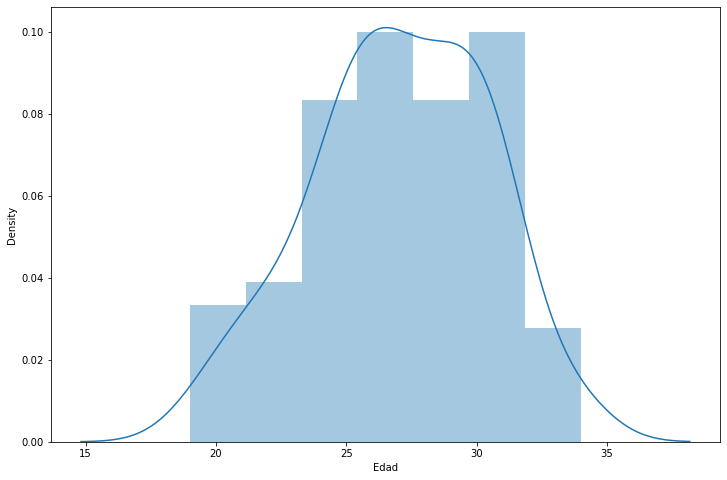

In [266]:
sns.distplot(edad_optima)

In [96]:
int_edad_optima= [tdf_2012[(tdf_2012['% de Victorias '] >52)].groupby('% de Victorias ')['Edad'].mean()]
int_edad_optima

[% de Victorias 
 53.57    26.0
 54.00    31.0
 54.55    25.0
 54.84    22.0
 55.10    25.0
 55.26    30.0
 55.81    21.0
 55.88    23.0
 56.41    28.0
 57.63    24.0
 58.33    27.0
 58.46    28.0
 58.97    30.0
 59.26    29.0
 59.68    25.0
 61.11    30.0
 63.24    28.0
 63.64    28.0
 65.52    26.0
 65.63    28.5
 65.96    34.0
 66.67    28.0
 66.70    22.0
 67.24    26.5
 67.27    23.0
 68.18    27.0
 68.80    27.0
 69.23    22.0
 70.73    28.0
 72.62    27.0
 77.78    25.0
 79.27    24.0
 83.52    30.0
 85.54    31.0
 86.21    25.0
 87.50    26.0
 Name: Edad, dtype: float64]

In [110]:
for i in int_edad_optima:
    print(round(i.mean(),1))

26.7


##  No influye el hecho de padecer lesiones sobre el % de victorias

Para ello hemos realizado un test estadístico sobre valores de una misma muestra en los que hemos comparado el% medio de % de Victorias entre aquellos jugadores que han sufrido lesiones y los que no.
   
- Insights:

  - La media de % de Victorias entre jugadores que han sufrido una lesion y los que no, no existe una diferencia significativa entre las dos variables.

  - Por lo que esta estadística no será crucial en nuestro análisis, pero evidentemente si el jugador esta sano, mejor.
    - pvalue(0.23)>alfa(0.05) -->No se rechaza la HO

In [108]:
Lesionado=tdf_2012[tdf_2012['Lesiones']==1]
No_Lesionado=tdf_2012[tdf_2012['Lesiones']==0]

stats.ttest_ind(Lesionado['% de Victorias '],No_Lesionado['% de Victorias '],equal_var=False)

Ttest_indResult(statistic=-1.2059411938007638, pvalue=0.2314998221559872)

## Identificación del candidato óptimo

In [113]:
tdf_2012[(tdf_2012['Perfil jugador']=='Sacador')&(tdf_2012['Altura cm']>187)&(tdf_2012['Altura cm']<192)&(tdf_2012['Tarifa Jugador']<200000)&(tdf_2012['Edad']>=25)&(tdf_2012['Edad']<28)]

,Jugador,Nacionalidad,Edad,Altura cm,Año,Efectividad Al Saque ©,% 1er Servicio,% Puntos Ganados 1er Saque,% Puntos Ganados 2do Saque,% Games Ganados Saque,...,Efectividad Bajo Presión,% Break Points Convertidos.1,% Break Points Salvados,% Tie Breaks Ganados,% Victorias Sets Definitivos,Tiempo de partido (min),% de Victorias,Lesiones,Tarifa Jugador,Perfil jugador
Ranking,,,,,,,,,,,,,,,,,,,,,
9,Jo-Wilfried Tsonga,France,27,188,2012,283.6,61.9,75.8,53.1,86.1,...,217.8,41.7,69.2,59.5,47.4,111,68.80,0,100000,Sacador
32,Jeremy Chardy,France,25,188,2012,265.8,56.3,74.4,50.2,81.6,...,208.7,37.5,68.6,52.6,50.0,107,54.55,0,50000,Sacador
38,Viktor Troicki,Serbia,26,190,2012,256.7,60.9,71.0,45.0,73.8,...,210.6,41.4,56.3,55.0,57.9,112,48.21,1,50000,Sacador
43,Denis Istomin,Uzbekistan,26,188,2012,274.9,64.5,71.4,52.8,80.7,...,200.1,38.6,62.2,51.7,47.6,109,48.39,0,50000,Sacador


In [115]:
tdf_2012[(tdf_2012['Perfil jugador']=='Sacador')&(tdf_2012['% de Victorias ']>52)&(tdf_2012['Altura cm']>187)&(tdf_2012['Altura cm']<192)&(tdf_2012['Tarifa Jugador']<200000)&(tdf_2012['Edad']>=25)&(tdf_2012['Edad']<28)]

,Jugador,Nacionalidad,Edad,Altura cm,Año,Efectividad Al Saque ©,% 1er Servicio,% Puntos Ganados 1er Saque,% Puntos Ganados 2do Saque,% Games Ganados Saque,...,Efectividad Bajo Presión,% Break Points Convertidos.1,% Break Points Salvados,% Tie Breaks Ganados,% Victorias Sets Definitivos,Tiempo de partido (min),% de Victorias,Lesiones,Tarifa Jugador,Perfil jugador
Ranking,,,,,,,,,,,,,,,,,,,,,
9,Jo-Wilfried Tsonga,France,27,188,2012,283.6,61.9,75.8,53.1,86.1,...,217.8,41.7,69.2,59.5,47.4,111,68.80,0,100000,Sacador
32,Jeremy Chardy,France,25,188,2012,265.8,56.3,74.4,50.2,81.6,...,208.7,37.5,68.6,52.6,50.0,107,54.55,0,50000,Sacador


### Análisis de capacidades técnicas

Para evaluar cúales son las estadísticas individuales más influyentes hemos medido la correlación entre cada una de estas estadísticas y el % de victorias.
Siendo las siguientes las más relevantes:

 - Efectividad Bajo Presión: 0.7094981797129352
 - % Games Ganados Saque: 0.6672912810196581
 - Efectividad Al Saque ©: 0.6669986049751795
 - % Puntos Ganados 2do Saque: 0.6382952903417061
 - % Victorias Sets Definitivos: 0.6100999640057122
 
 
 Insights:
- El jugador Jo Wilfred Tsonga supera todos los parametros mínimos excepto uno (4/5), el % de victorias en los sets definitivos.
- Por lo que podemoos considerar el jugador como apto.

In [116]:
corr=tdf_2012.corr()["% de Victorias "].sort_values(ascending=False)
corr

% de Victorias                  1.000000
Tarifa Jugador                  0.736054
Efectividad Bajo Presión        0.709498
% Games Ganados Saque           0.667291
Efectividad Al Saque ©          0.666999
% Puntos Ganados 2do Saque      0.638295
% Victorias Sets Definitivos    0.610100
% Puntos Ganados 1er Saque      0.565976
% Games Al Resto                0.535884
% Restos 1er Saque              0.528571
% Tie Breaks Ganados            0.517393
% Break Points Salvados         0.496138
Efectividad Al Resto            0.475851
Tiempo de partido (min)         0.411772
Prom. Aces Por Partido          0.320933
% Restos 2° Saque               0.317594
% Break Points Convertidos      0.273576
% Break Points Convertidos.1    0.273576
Altura cm                       0.191849
Edad                            0.059897
% 1er Servicio                  0.044283
Lesiones                       -0.131591
Prom. Dobles Por Partido       -0.138982
Año                                  NaN
Name: % de Victo

In [117]:
important_corrs = (corr[abs(corr) > 0.6][corr != 1.0]).to_dict()

important_corrs

{'Tarifa Jugador': 0.7360543998654379,
 'Efectividad Bajo Presión': 0.7094981797129352,
 '% Games Ganados Saque': 0.6672912810196581,
 'Efectividad Al Saque ©': 0.6669986049751795,
 '% Puntos Ganados 2do Saque': 0.6382952903417061,
 '% Victorias Sets Definitivos': 0.6100999640057122}

#### Código

In [144]:
min_Efectividad_BP=[tdf_2012['Efectividad Bajo Presión'].mean()]
min_por_juegos_ganados_saque=tdf_2012['% Games Ganados Saque'].mean()
min_efectividad_saque=tdf_2012['Efectividad Al Saque ©'].mean()
min_pts_ganados_2ndosaque=tdf_2012['% Puntos Ganados 2do Saque'].mean()
min_vic_sets_def=tdf_2012['% Victorias Sets Definitivos'].mean()

In [150]:
# JO WILFRED TSONGA

Efectividad_BP_JWT=tdf_2012[tdf_2012['Jugador']=='Jo-Wilfried Tsonga'].groupby('Jugador')['Efectividad Bajo Presión'].mean()
Juegos_ganados_saque_JWT=tdf_2012[tdf_2012['Jugador']=='Jo-Wilfried Tsonga'].groupby('Jugador')['% Games Ganados Saque'].mean()
Efectividad_saque_JWT=tdf_2012[tdf_2012['Jugador']=='Jo-Wilfried Tsonga'].groupby('Jugador')['Efectividad Al Saque ©'].mean()
Pts_ganados_2ndosaque_JWT=tdf_2012[tdf_2012['Jugador']=='Jo-Wilfried Tsonga'].groupby('Jugador')['% Puntos Ganados 2do Saque'].mean()
vic_set_def_JWT=tdf_2012[tdf_2012['Jugador']=='Jo-Wilfried Tsonga'].groupby('Jugador')['% Victorias Sets Definitivos'].mean()

In [242]:
print(min_Efectividad_BP<Efectividad_BP_JWT)
print(min_por_juegos_ganados_saque<Juegos_ganados_saque_JWT)
print(min_efectividad_saque<Efectividad_saque_JWT)
print(min_pts_ganados_2ndosaque<Pts_ganados_2ndosaque_JWT)
print(min_vic_sets_def<vic_set_def_JWT)
print()
print( min_vic_sets_def-vic_set_def_JWT)

Jugador
Jo-Wilfried Tsonga    True
Name: Efectividad Bajo Presión, dtype: bool
Jugador
Jo-Wilfried Tsonga    True
Name: % Games Ganados Saque, dtype: bool
Jugador
Jo-Wilfried Tsonga    True
Name: Efectividad Al Saque ©, dtype: bool
Jugador
Jo-Wilfried Tsonga    True
Name: % Puntos Ganados 2do Saque, dtype: bool
Jugador
Jo-Wilfried Tsonga    False
Name: % Victorias Sets Definitivos, dtype: bool

Jugador
Jo-Wilfried Tsonga    2.156471
Name: % Victorias Sets Definitivos, dtype: float64


## Evaluación del Modelo

- Insights:

  - El modelo creado dispone de un R2 de 0.84 por lo que podemos definir que gran parte de la variabilidad es explicada con las variables del modelo

#### Codigo

In [163]:
lr=LinearRegression()

In [165]:
# Eliminamos aquellas variables categoricas
X=tdf_2012[['Edad', 'Altura cm',
       'Efectividad Al Saque ©', '% 1er Servicio',
       '% Puntos Ganados 1er Saque', '% Puntos Ganados 2do Saque',
       '% Games Ganados Saque', 'Prom. Aces Por Partido',
       'Prom. Dobles Por Partido', 'Efectividad Al Resto ',
       '% Restos 1er Saque', '% Restos 2° Saque', '% Games Al Resto',
       '% Break Points Convertidos', 'Efectividad Bajo Presión',
       '% Break Points Convertidos.1', '% Break Points Salvados',
       '% Tie Breaks Ganados', '% Victorias Sets Definitivos',
       'Tiempo de partido (min)']]
y=tdf_2012['% de Victorias ']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [167]:
lr.fit(X_train, y_train)

LinearRegression()

### R2 Score

In [168]:
print('R2 Score:',lr.score(X_test,y_test))

R2 Score: 0.8407729728855806


In [172]:
y_pred = lr.predict(X)
y_pred

array([91.54518797, 83.1578838 , 78.3963034 , 91.14783152, 78.22790002,
       71.3789282 , 75.39741398, 63.7917886 , 63.75503695, 72.10257572,
       66.52633311, 65.59997996, 72.35204277, 67.18318897, 66.50481152,
       57.56469315, 61.23585444, 58.52999132, 71.25196382, 63.7698736 ,
       59.66553231, 62.45582287, 59.91630941, 56.69356944, 58.80295752,
       67.29312299, 51.62336835, 47.75163932, 57.78979816, 44.81734138,
       52.16553231, 53.16442919, 42.2927895 , 53.51011187, 57.62663932,
       58.02060429, 53.78867806, 59.11322294, 47.95159622, 47.97821653,
       42.24540751, 51.99076494, 49.6191139 , 49.98188826, 52.07757668,
       53.27999132, 57.75882572, 45.47795215, 46.80142367, 44.43841998,
       48.78431122, 42.96580667, 44.95817839, 49.47624874, 41.52567143,
       40.95315993, 40.47534677, 50.57085215, 53.46373251, 51.06532108,
       51.33927845, 41.6219617 , 47.97423402, 46.2614349 , 42.64363256,
       63.19414706, 31.78789706, 53.15198537, 40.68274141, 32.12

# Previsión de rendimiento del jugador a dos años vista

In [174]:
tdf_FRA

,date,Jugador,Balance V/D,tournament,level,bestOf,surface,indoor,speed,round,...,loser_seed,loser_country_name,loser_country_id,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,winner_entry
0,2012-11-05,Jo-Wilfried Tsonga,0,Tour Finals,F,3,H,True,77.0,RR,...,7,France,FRA,8,-6,2177.0,6-2 7-6(3),NaN,NaN,NaN
1,2012-11-05,Jo-Wilfried Tsonga,0,Tour Finals,F,3,H,True,77.0,RR,...,7,France,FRA,8,-9,2186.0,7-5 3-6 6-1,NaN,NaN,NaN
2,2012-11-05,Jo-Wilfried Tsonga,0,Tour Finals,F,3,H,True,77.0,RR,...,7,France,FRA,8,-4,2190.0,7-6(4) 6-3,NaN,NaN,NaN
3,2012-10-29,Jo-Wilfried Tsonga,0,Paris Masters,M,3,H,True,69.0,QF,...,6,France,FRA,7,-8,2198.0,6-2 7-5,NaN,NaN,NaN
4,2012-10-29,Jo-Wilfried Tsonga,1,Paris Masters,M,3,H,True,69.0,R16,...,11,Spain,ESP,13,-8,2141.0,7-6(4) 7-6(3),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2011-01-17,Jo-Wilfried Tsonga,1,Australian Open,G,5,H,False,55.0,R128,...,GER,57,-7,1905,4-6 2-6 6-2 6-3 6-4,13.0,NaN,NaN,NaN,NaN
159,2011-01-03,Jo-Wilfried Tsonga,0,Doha,B,3,H,False,73.0,SF,...,FRA,13,-3,2121,6-3 7-6(2),2.0,3,NaN,NaN,NaN
160,2011-01-03,Jo-Wilfried Tsonga,1,Doha,B,3,H,False,73.0,QF,...,ESP,33,-6,2002,7-6(4) 7-6(9),3.0,7,NaN,NaN,NaN
161,2011-01-03,Jo-Wilfried Tsonga,1,Doha,B,3,H,False,73.0,R16,...,UKR,320,-4,1756,6-2 6-4,3.0,NaN,NaN,WC,NaN


#### Código

In [175]:
tdf_ts=tdf_FRA[['date','Balance V/D']]

In [176]:
tdf_ts

,date,Balance V/D
0,2012-11-05,0
1,2012-11-05,0
2,2012-11-05,0
3,2012-10-29,0
4,2012-10-29,1
...,...,...
158,2011-01-17,1
159,2011-01-03,0
160,2011-01-03,1
161,2011-01-03,1


In [177]:
tdf_ts['date']=pd.to_datetime(tdf_ts.date)

In [178]:
tdf_ts.set_index('date',inplace=True)

In [179]:
tdf_ts=tdf_ts.groupby(pd.Grouper(freq='M')).sum()

## Agrupamos el número de victorias por meses

In [180]:
tdf_ts

,Balance V/D
date,
2011-01-31,5
2011-02-28,6
2011-03-31,1
2011-04-30,1
2011-05-31,5
2011-06-30,10
2011-07-31,1
2011-08-31,9
2011-09-30,4


In [182]:
tdf_ts = tdf_ts[(tdf_ts.T != 0).any()]

##  Modelo ARIMA

In [184]:
model=auto_arima(tdf_ts,start_p=1,d=1,start_q=1,
          max_p=2,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=2,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=56.503, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=58.503, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=58.503, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=60.503, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=54.591, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=58.521, Time=0.27 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=56.394, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=56.541, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1

In [185]:
prediction=model.predict(n_periods=22)

In [186]:
prediction.round((1))

array([ 6.8, 11.4,  8.5,  9.2,  6.4,  5.6,  8.8,  8.4,  4.9,  6.2,  6. ,
       13.2,  8.8, 13.6, 10.6, 11.3,  8.5,  7.7, 10.9, 10.5,  7.1,  8.3])

#### Código

In [ ]:
# Creamos un data frame a partir del array correspondiente a las victorias predecidas para las próximas dos temporadas

In [187]:
columns=['Balance V/D']
rows=['2013-01-31',
'2013-02-28',
'2013-03-31',
'2013-04-30',
'2013-05-31',
'2013-06-30',
'2013-07-31',
'2013-08-31',
'2013-09-30',
'2013-10-31',
'2013-11-30',
'2014-01-31',
'2014-02-28',
'2014-03-31',
'2014-04-30',
'2014-05-31',
'2014-06-30',
'2014-07-31',
'2014-08-31',
'2014-09-30',
'2014-10-31',
'2014-11-30']
df=pd.DataFrame(data=prediction,index=rows,columns=columns)

In [188]:
df.index.name = 'date'

In [ ]:
# Anexamos el dataframe de los resultados predichos con los actuales resultados

In [189]:
result_df=tdf_ts.append(df)

In [190]:
result_df.index = result_df.index.values.astype('M8[D]')

In [191]:
result_df.index.name = 'date'

In [192]:
result_df.rename(columns={'Balance V/D':'Victorias Mensuales'},inplace=True)

In [193]:
result_df['Victorias Mensuales']=result_df['Victorias Mensuales'].round()

##  Analizamos la tendencia de los restultados

In [194]:
result_df

,Victorias Mensuales
date,
2011-01-31,5.0
2011-02-28,6.0
2011-03-31,1.0
2011-04-30,1.0
2011-05-31,5.0
2011-06-30,10.0
2011-07-31,1.0
2011-08-31,9.0
2011-09-30,4.0


In [259]:
Vict_men_2011=result_df[:11].mean()
Vict_men_2012=result_df[11:21].mean()
Vict_men_2013=result_df[21:32].mean()
Vict_men_2014=result_df[32:44].mean()

2011 Promedio de Victorias Mensuales    5.2
dtype: float64


In [261]:
print('2011 Promedio de',round(Vict_men_2011,1))
print('2012 Promedio de',round(Vict_men_2012,1))
print('2013 Promedio de',round(Vict_men_2013,1))
print('2014 Promedio de',round(Vict_men_2014),1)

2011 Promedio de Victorias Mensuales    5.2
dtype: float64
2012 Promedio de Victorias Mensuales    5.7
dtype: float64
2013 Promedio de Victorias Mensuales    7.5
dtype: float64
2014 Promedio de Victorias Mensuales    10.0
dtype: float64 1


<AxesSubplot:xlabel='date'>

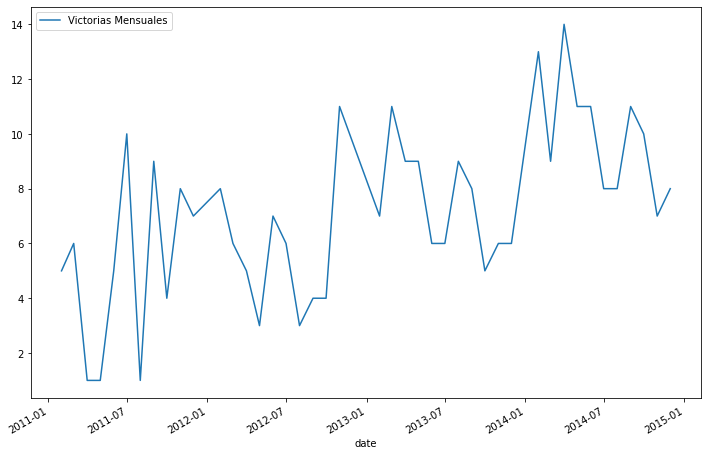

In [260]:
result_df.plot()